Question:
* assuming that I want to encode (-1,0,1) , with bits, how many numbers can I encode for given bits, and what is the packing efficiency?
* 

In [1]:
import jax.numpy as jnp
import numpy

In [2]:
# let's compute what is the total number of representable combinations for given count of bits and trits. Then we will see what is the count of unused combinations.


In [3]:
repcount_bits = lambda x: 2**x
repcount_trits = lambda x: 3**x


In [4]:
3**6

729

In [22]:
bitcounts = []
bit_capacity = []
for x_bit in range(1,16*1024):
    bitcounts.append(x_bit)
    bit_capacity.append(repcount_bits(x_bit))
    # print(f"bits: {x_bit}, representable: {repcount_bits(x_bit)}")

trit_capacity = []    
#for x_trit in range(1,729):
for x_trit in range(1,200):
    trit_capacity.append(repcount_trits(x_trit))
    # print(f"trits: {x_trit}, representable: {repcount_trits(x_trit)}")

In [23]:
# for each bit count, find the highest trit count that is less than or equal to the bit count representable
packing_efficiencies =[]
bits_to_pack = []
for trits_idx, trit_reps in enumerate(trit_capacity):
    for bits_idx, bit_reps in enumerate(bit_capacity):
        if bit_reps >= trit_reps:
            packing_efficiency = trit_reps/bit_reps
            packing_efficiencies.append(packing_efficiency)
            bits_to_pack.append(bits_idx+1)
            unused_representations = bit_reps - trit_reps
            print(f"trits: {trits_idx+1} => {trit_reps}, bits: {bits_idx+1} => {bit_reps} ; efficiency: {packing_efficiency:0.4f}; unused: {unused_representations}")
            
            break

trits: 1 => 3, bits: 2 => 4 ; efficiency: 0.7500; unused: 1
trits: 2 => 9, bits: 4 => 16 ; efficiency: 0.5625; unused: 7
trits: 3 => 27, bits: 5 => 32 ; efficiency: 0.8438; unused: 5
trits: 4 => 81, bits: 7 => 128 ; efficiency: 0.6328; unused: 47
trits: 5 => 243, bits: 8 => 256 ; efficiency: 0.9492; unused: 13
trits: 6 => 729, bits: 10 => 1024 ; efficiency: 0.7119; unused: 295
trits: 7 => 2187, bits: 12 => 4096 ; efficiency: 0.5339; unused: 1909
trits: 8 => 6561, bits: 13 => 8192 ; efficiency: 0.8009; unused: 1631
trits: 9 => 19683, bits: 15 => 32768 ; efficiency: 0.6007; unused: 13085
trits: 10 => 59049, bits: 16 => 65536 ; efficiency: 0.9010; unused: 6487
trits: 11 => 177147, bits: 18 => 262144 ; efficiency: 0.6758; unused: 84997
trits: 12 => 531441, bits: 20 => 1048576 ; efficiency: 0.5068; unused: 517135
trits: 13 => 1594323, bits: 21 => 2097152 ; efficiency: 0.7602; unused: 502829
trits: 14 => 4782969, bits: 23 => 8388608 ; efficiency: 0.5702; unused: 3605639
trits: 15 => 14348907

In [12]:
packing_efficiencies = numpy.array(packing_efficiencies)
# get max efficiency and the corresponding bit and trit count
max_efficiency = packing_efficiencies.max()
max_efficiency_idx = packing_efficiencies.argmax()
max_efficiency_trit_count = max_efficiency_idx
max_efficiency_bit_count = bits_to_pack[max_efficiency_idx]

In [13]:
print(f"max efficiency: {max_efficiency:0.4f}, trit count: {max_efficiency_trit_count}, max_efficiency_bit_count: {max_efficiency_bit_count}")


max efficiency: 0.9938, trit count: 1170, max_efficiency_bit_count: 58


(0.0, 1.0)

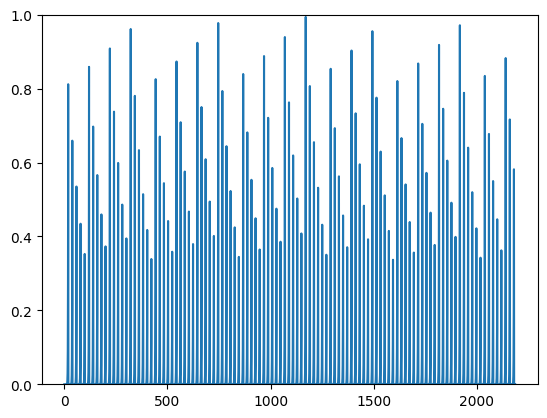

In [9]:
# plot
import matplotlib.pyplot as plt
plt.plot(packing_efficiencies)
plt.ylim(0,1)